<a href="https://colab.research.google.com/github/FrancoSandri/TP_Final_Chona/blob/main/TP_Final_Chona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Problema a resolver***

El problema que decidimos resolver es la clasificación de prendas de ropas. La solución que pensamos fue hacer un modelo que permita clasificar estos artículos de ropa, provenientes del set de datos de Fashion MNIST que contiene 70.000 imágenes, en 10 categorias. Estas son:

-Remera / Top

-Pantalón

-Pullover

-Vestido

-Abrigo

-Sandalias

-Camisa 

-Zapatillas

-Mochila 

-Botas


###**Importamos las librerías a utilizar**

Descargamos keras_visualizer

In [1]:
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras_visualizer import visualizer 
from keras.utils.vis_utils import plot_model
from keras import models, layers  
from IPython.display import display, Image

Importamos el dataset de las imágenes de las prendas del set de datos de **Fashion MNIST.**

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

***train_images*** y ***train_labels*** son los arreglos que el training set del modelo de datos usa para aprender.
Luego, el modelo es probado contra los arreglos test set, el ***test_images***, y ***test_labels***.

Ya que los Class names no estan incluidos en el dataset, lo guardamos aca para usarlos cuando se visualicen las imagenes:

In [4]:
class_names = ['Remera / Top', 'Pantalón', 'Pullover', 'Vestido', 'Abrigo',
               'Sandalias', 'Camisa', 'Zapatillas', 'Mochila', 'Botas']

Muestra que hay **60.000** imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28.

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

Hay **10.000** imagenes en el set de pruebas. Cada imagen es representada como pixeles de 28x28.

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

Los valores de los píxeles de las imágenes del dataset se encuentran entre 0 y 255. Es por eso que normnalizamos estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, dividimos sus valores por 255.

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Reescalamos las imagenes para poder entrenar al modelo.

In [10]:
x_train = train_images.reshape(train_images.shape[0], -1)
x_test = test_images.reshape(test_images.shape[0], -1)
print(x_train.shape)

(60000, 784)


####**Visualizamos 25 ejemplos de entrada con sus respectivas categorías.**

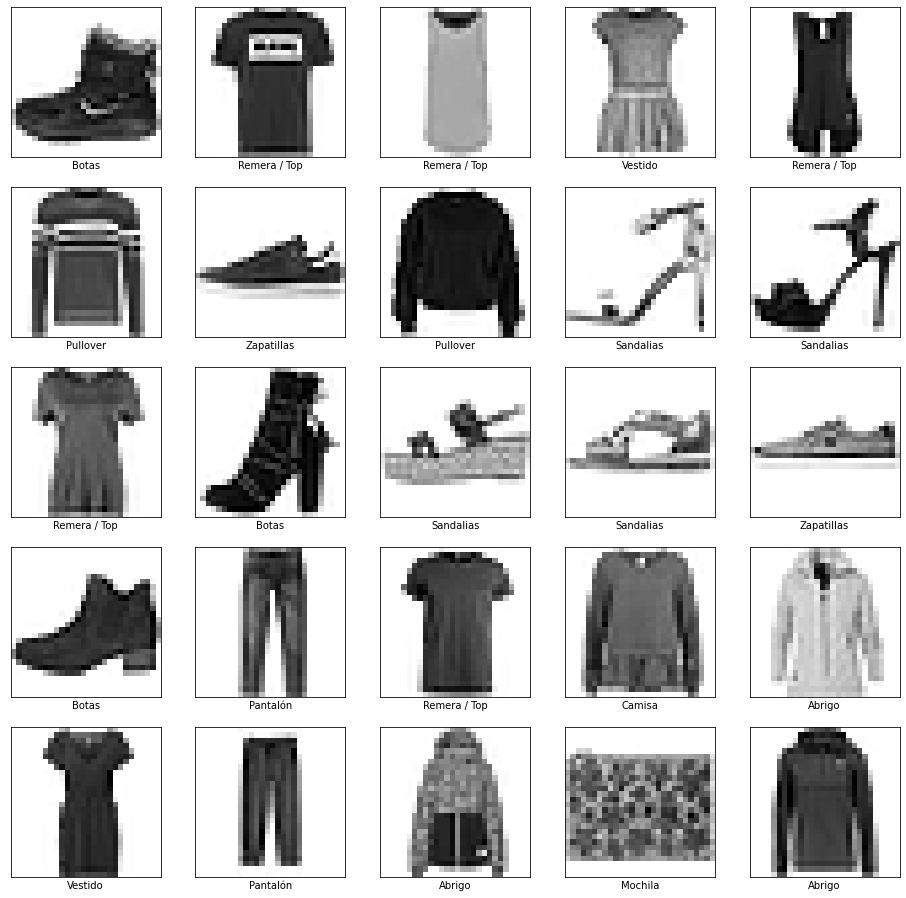

In [11]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

###**Creación del modelo**

La primera capa de esta red, tf.keras.layers.Dense, recibe un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles).

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas tf.keras.layers.Dense. La segunda capa Dense tiene 128 neuronas y la ultima capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.



In [12]:
model = keras.Sequential()
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

####**Compilamos el modelo**

Compilamos el modelo aclarando: 

Loss function: mide que tan exacto es el modelo durante el entrenamiento.

Optimizer: es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.

Metrics: se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy, la fraccion de la imagenes que son correctamente clasificadas.

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


####**Visualizamos el modelo**

Aca podemos visualizar el funcionamiento del modelo con keras-visualizer.

Lo que se puede observar en el gráfico es la activación de las neuronas de entrada, que son las correspondinte a los pixeles de nuestra foto. Estas a su vez, activan a algunas neuronas especificas de la otra capa. A su vez, estas activan a 1 de las 10 neuronas de salida que son las que nos devuelven qué tipo de prenda se trata. Esto occure sólo cuando se sabe que tan positivo es el  peso o weight, que en este grafico esta representado por las lineas que envían "mensajes" de una nuerona a otra.

In [14]:
visualizer(model, format='png', view=True)

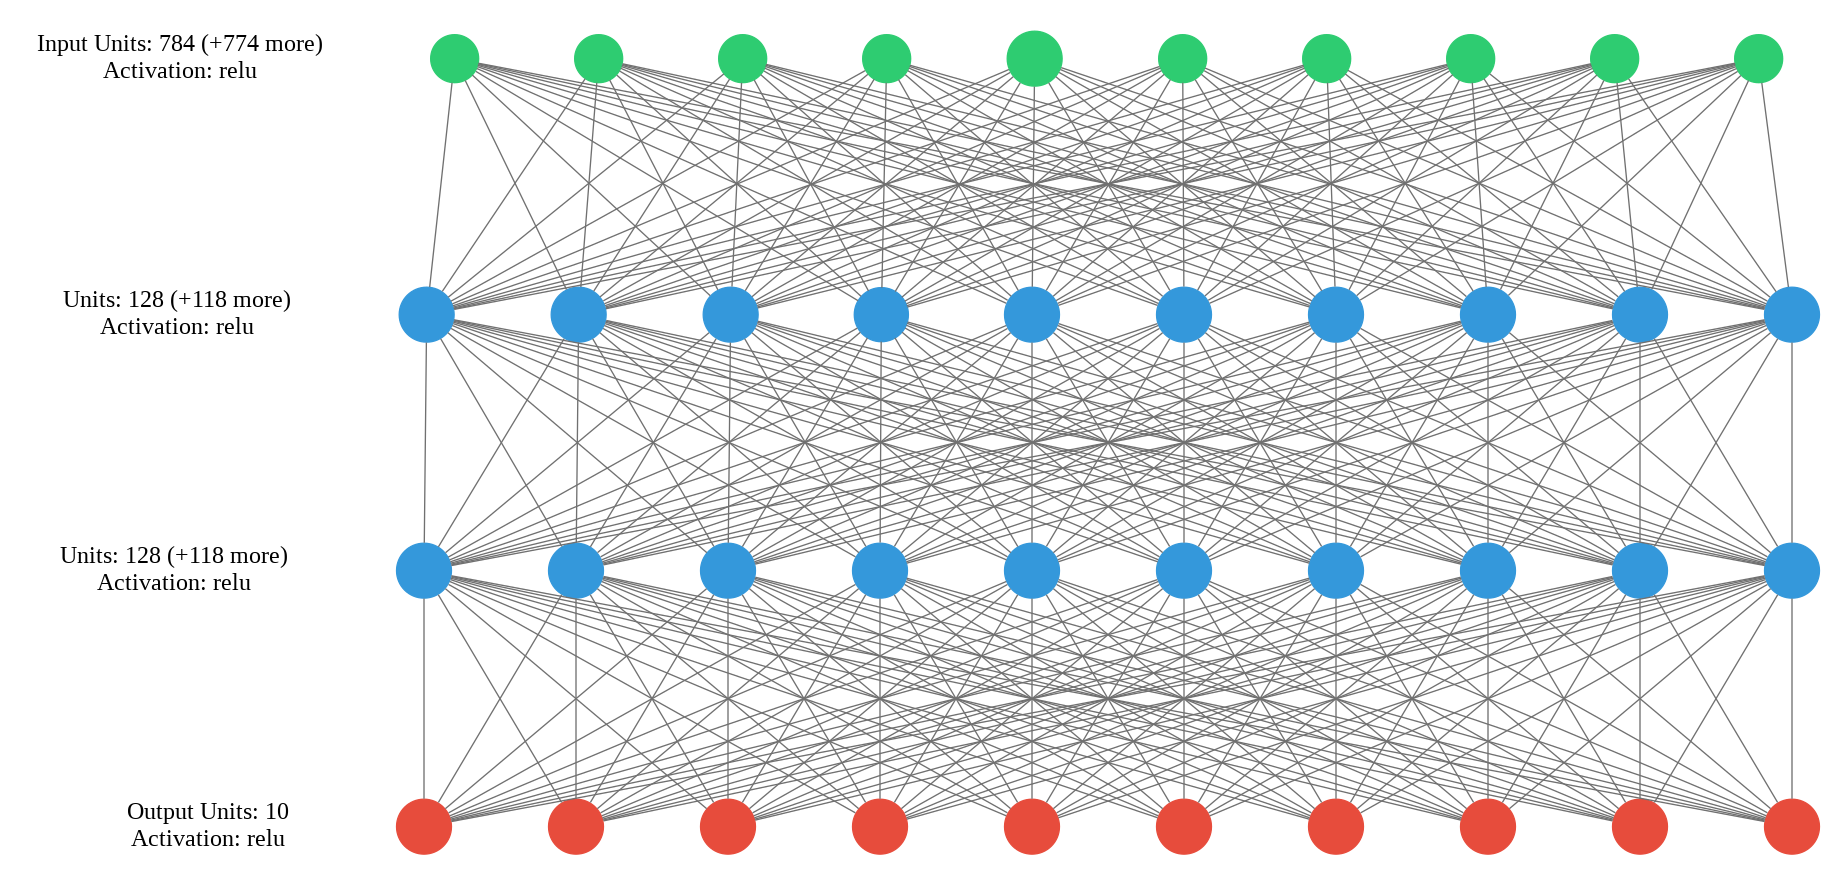

In [15]:
Image(filename = "/content/graph.png", width = 1400, height = 900)

###**Entrenamos el modelo**

Entrenamos al modelo utilizando el comando de Keras para entrenar el modelo. ***x_train*** es la matriz de datos de entrenamiento, ***train_labels*** es el vector de clasificación del entrenamiento. ***epochs*** indica la cantidad de vueltas que nuestro algoritmo ha completado durante ese entrenamiento. Por último, me reservo una cantidad de ejemplos para la validación en la variable ***validation_split***. 

Con esto podemos calcular la cantidad de pérdida y la de accuracy tanto de que tan bien está aprendiendo el modelo los datos de entrenamiento, como también de la comparación con los datos de entrenamiento reservados en el validation split.

In [16]:
historial = model.fit(x_train,train_labels, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5065 - accuracy: 0.8185 - val_loss: 0.4033 - val_accuracy: 0.8568
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3731 - accuracy: 0.8634 - val_loss: 0.4060 - val_accuracy: 0.8522
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3360 - accuracy: 0.8753 - val_loss: 0.3786 - val_accuracy: 0.8664
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3120 - accuracy: 0.8841 - val_loss: 0.3489 - val_accuracy: 0.8731
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8893 - val_loss: 0.3197 - val_accuracy: 0.8844
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2786 - accuracy: 0.8959 - val_loss: 0.3311 - val_accuracy: 0.8832
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2674 - accuracy: 0.8985 - val_loss: 0.3259 - val_accurac

Nos fijamos cómo fue evolucionando la accuracy y la pérdida del entrenamiento del modelo y su evolución en la validación.

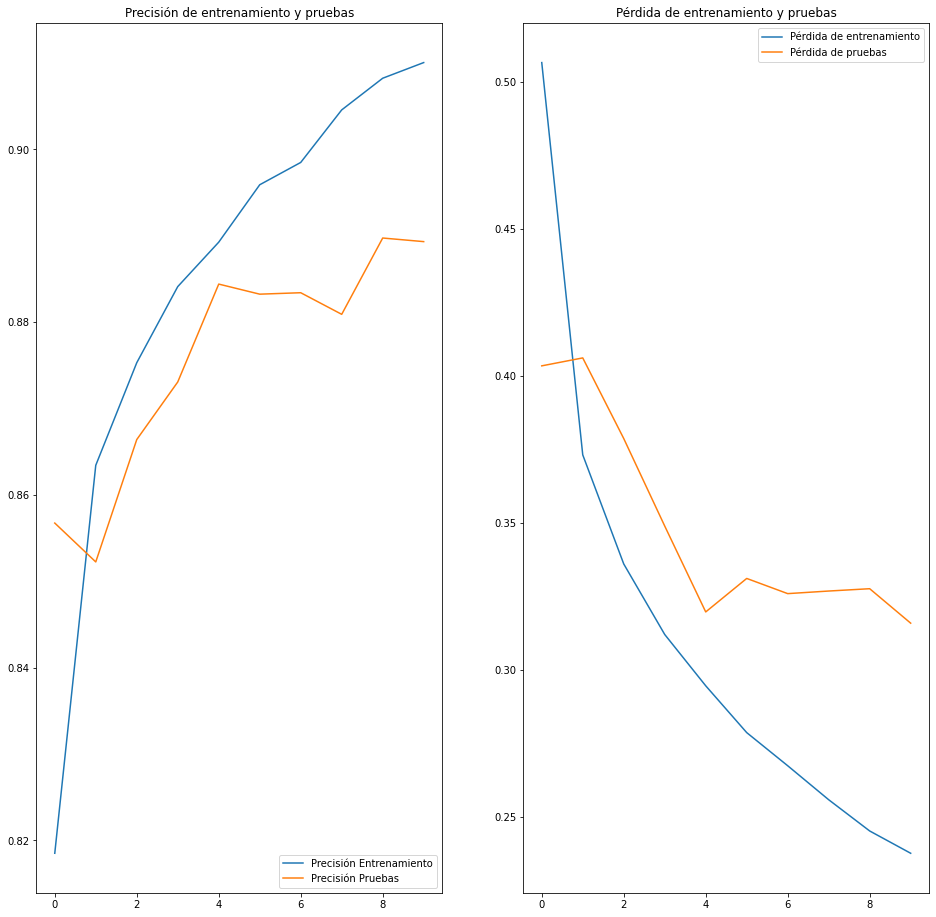

In [17]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(10)

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

###**Evaluamos el modelo**

Una vez ya con el modelo entrenado, podemos realizar predicciones.

In [18]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Estas funciones nos permiten graficar las predicciones de todo el set de las 10 clases.

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Luego, indicamos la cantidad de imagenes que queremos que nos muestre, en este caso son las primeras 60, y nos muestra la predicción. Como nuestro modelo tenía una loss de 0.3158 es posible que en algunos casos la predicción no sea acertada. Sin embargo, en la gran mayoría de los casos lo es.

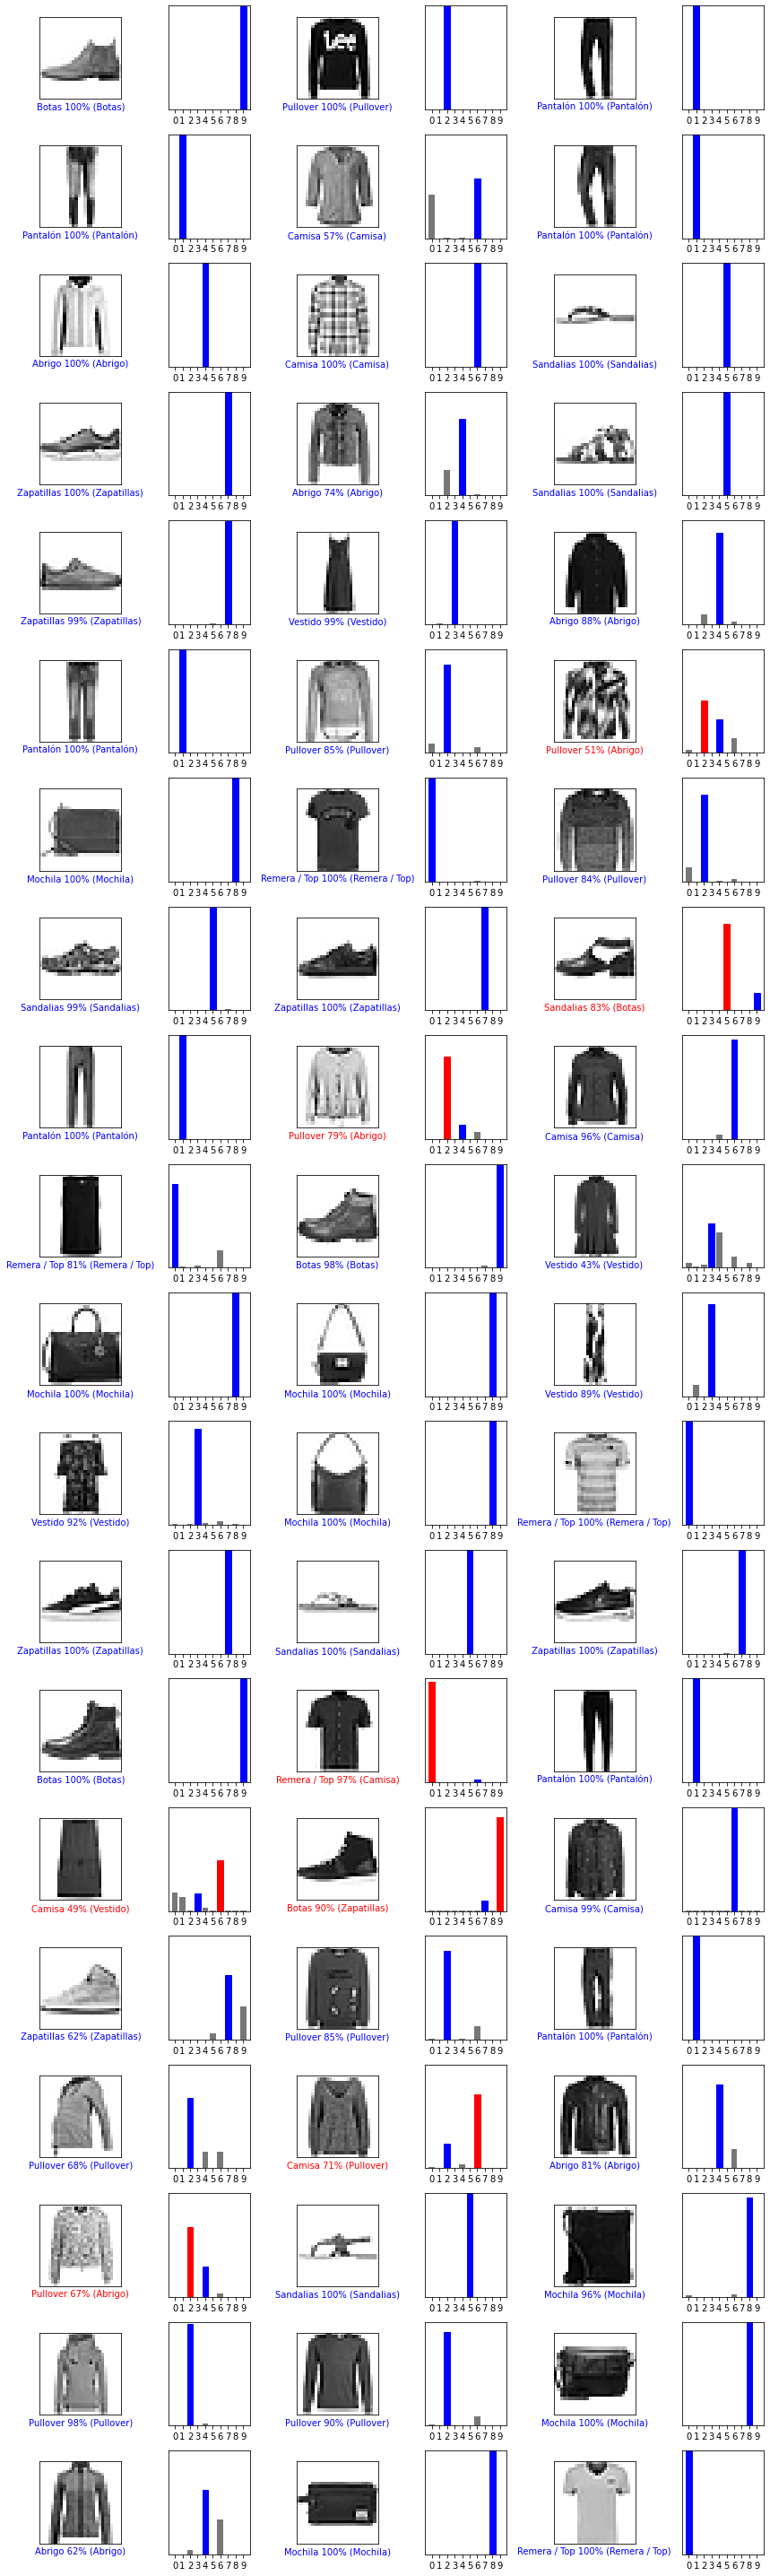

In [20]:
num_rows = 20
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

###***Conclusión***

A modo de conclusión, podemos decir que este modelo permite clasificar imágenes cargadas de un dataset de prendas de ropa. Si bien es cierto que tiene un porcentaje muy bajo de pérdida, se podría decir que la predicción la efectúa con mucha presición. Pero a grandes rasgos, permite clasificar prendas de ropas de una manera rápida y con un alto grado de eficacia.